### Support Vector Machine - Wine Dataset
Joshua Rosell

Importing needed libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
from sklearn.inspection import DecisionBoundaryDisplay

Reading the dataset.

In [2]:
df_red = pd.read_csv('winequality-red.csv')

In [3]:
df_white = pd.read_csv('winequality-white.csv')

Combining dataframes. The following code combines the red and white wine dataframes.

In [4]:
# Add a new column to each dataframe to indicate the type of wine
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine the dataframes
df = pd.concat([df_red, df_white], ignore_index=True)

# Display the combined dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Encoding of categorical variables. Red is encoded as 0 and white as 1. 

In [5]:
df['type'] = df['type'].map({'red': 0, 'white': 1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Creating a pairplot of (continuous) features. This pairplot can determine choice of two features that may distinguish red wine from white wine.

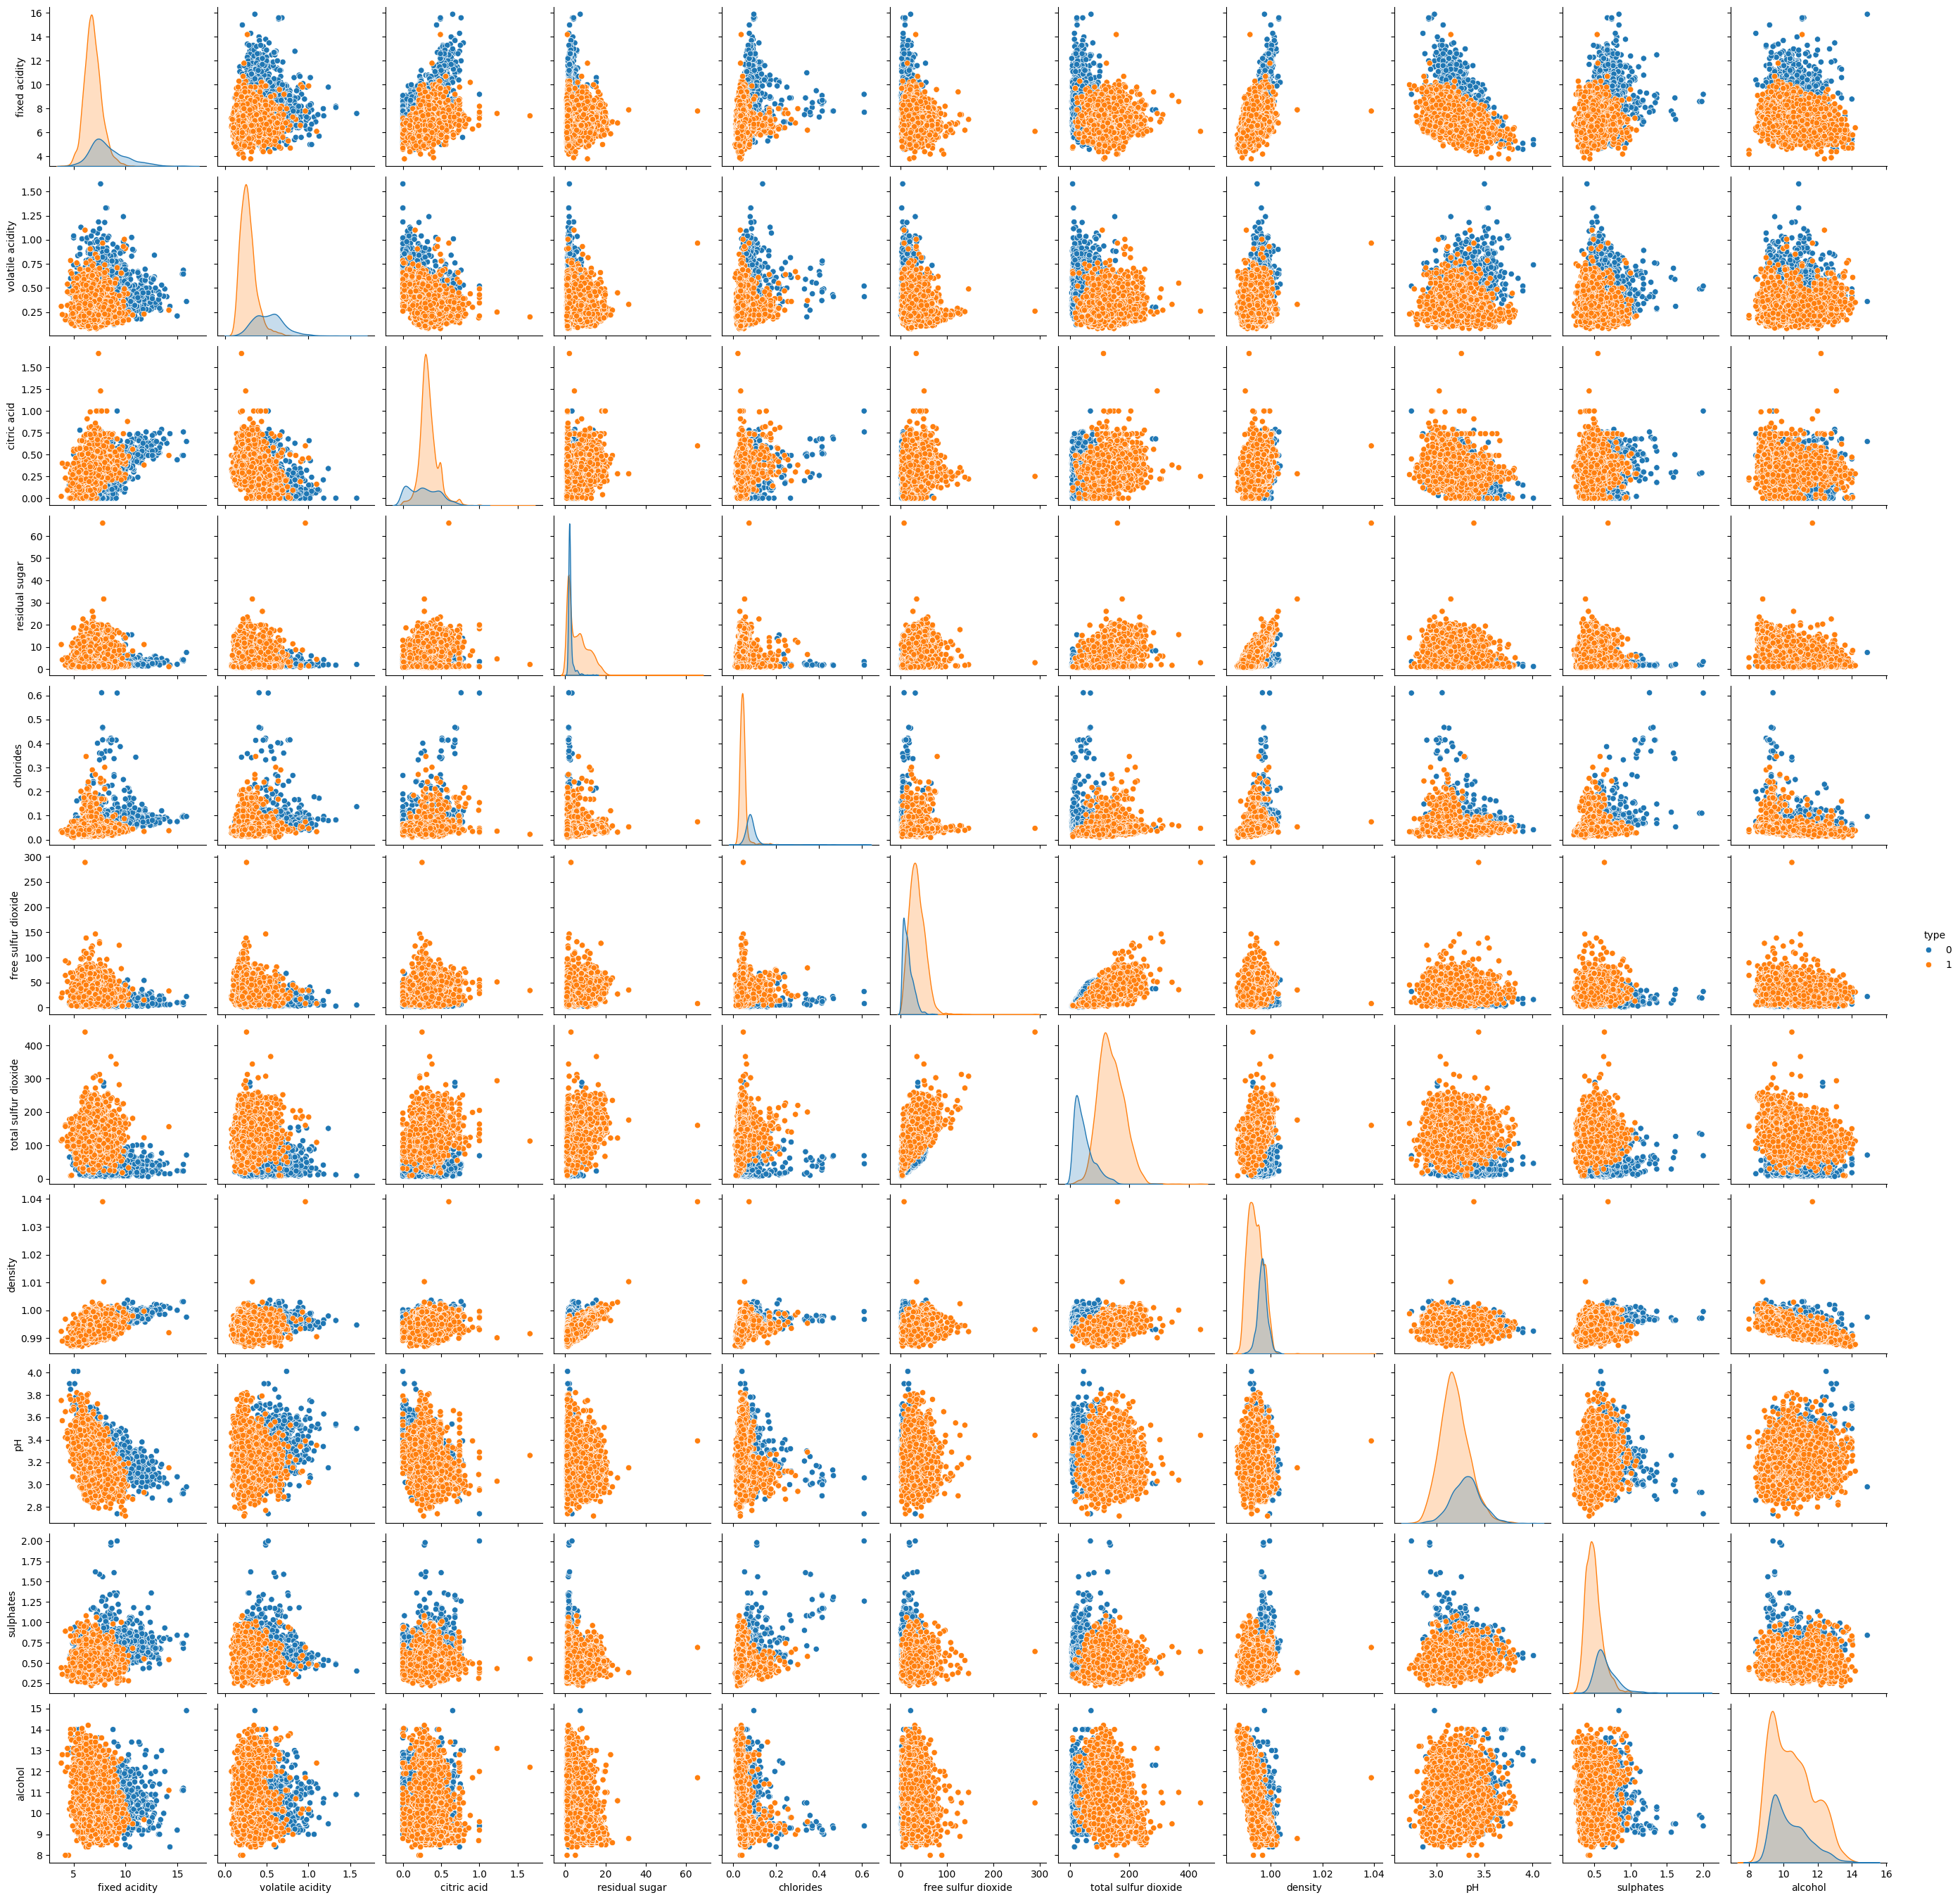

In [6]:
sns.pairplot(df.drop(columns='quality'), hue='type')
plt.show()

From the pairplot, it seems that total sulfur dioxide and chlorides are two features that may distinguish red wine from white wine.

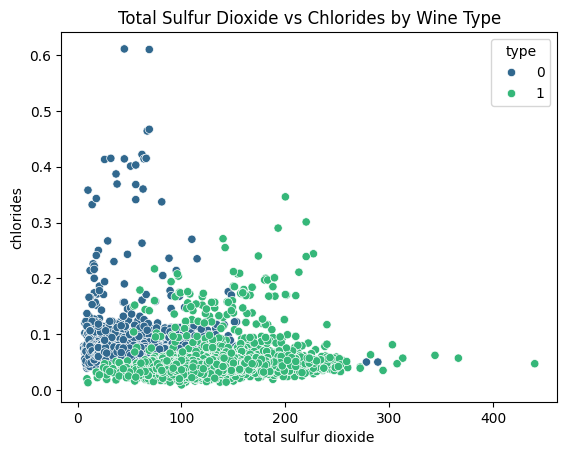

In [7]:
sns.scatterplot(data=df, x='total sulfur dioxide', y='chlorides', hue='type', palette='viridis')
plt.title('Total Sulfur Dioxide vs Chlorides by Wine Type')
plt.show()

Separating features and target variable. Features are fixed acidity, volatile acidity, down to quality. The target variable is wine type, red or white wine.

In [8]:
# Separate features and target variable
X = df.iloc[:, 0:12]  # Features from columns 0 to 11, quality is column 11
y = df.iloc[:, -1]    # Target variable from column 12, wine type is the target variable

Splitting data into training and test set. Training and test set are 80% and 20% split respectively.

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the sizes of the splits
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 5197
Test set size: 1300


Feature scaling. This is necessary for SVM classification.

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the SVM model for all the features on the training set. This code block implements and evaluates an SVM classifier using the One-vs-One strategy for classification of wine data.

In [11]:
# Create OneVsOne SVM classifier
ovo_clf = OneVsOneClassifier(SVC(kernel='rbf', random_state=0))

# Train the classifier
ovo_clf.fit(X_train, y_train)

# Make predictions and print performance metrics
y_pred = ovo_clf.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[309   2]
 [  1 988]]


In [12]:
(309+988)/(309+988+2+1)

0.9976923076923077

Retrieving features total sulfur dioxide and chlorides from training set. This will be used to visualize decision boundaries of the classifier. Visualization of decision boundaries only works for 2D data.

In [13]:
X_2D = X_train[:,[6,4]] # total sulfur dioxide and chlorides from training set
y_2D = y_train # get the target variable from the training set

Similar from the preceding code, but from test set.

In [14]:
X_2D_test = X_test[:,[6,4]] # total sulfur dioxide and chlorides from test set
y_2D_test = y_test # get the target variable from the test set

Training the SVM model on the training set but only for the two features.

In [15]:
# Create OneVsOne SVM classifier for total sulfur dioxide and chlorides
ovo_clf_2D = OneVsOneClassifier(SVC(kernel='rbf', random_state=0))

# Train the classifier
ovo_clf_2D.fit(X_2D, y_2D)

# Make predictions and print performance metrics
y_pred_2D = ovo_clf_2D.predict(X_2D_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_2D_test, y_pred_2D))


Confusion Matrix:
 [[292  19]
 [ 17 972]]


In [16]:
(292+972)/(292+972+19+17)

0.9723076923076923

Visualization of decision boundaries of wine type.

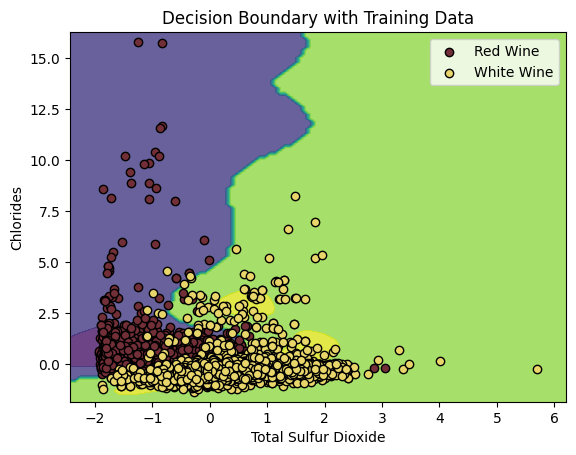

In [17]:
DecisionBoundaryDisplay.from_estimator(ovo_clf_2D, X_2D, alpha=0.8, eps=0.5)
plt.scatter(X_2D[y_2D == 0, 0], X_2D[y_2D == 0, 1], c='#722F37', edgecolors="k", label='Red Wine')
plt.scatter(X_2D[y_2D == 1, 0], X_2D[y_2D == 1, 1], c='#E9D66B', edgecolors="k", label='White Wine')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Chlorides')
plt.legend()
plt.title('Decision Boundary with Training Data')
plt.show()

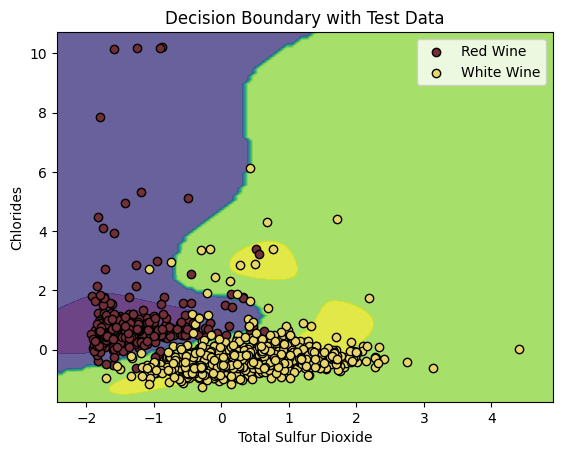

In [18]:
DecisionBoundaryDisplay.from_estimator(ovo_clf_2D, X_2D_test, alpha=0.8, eps=0.5)
plt.scatter(X_2D_test[y_2D_test == 0, 0], X_2D_test[y_2D_test == 0, 1], c='#722F37', edgecolors="k", label='Red Wine')
plt.scatter(X_2D_test[y_2D_test == 1, 0], X_2D_test[y_2D_test == 1, 1], c='#E9D66B', edgecolors="k", label='White Wine')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Chlorides')
plt.legend()
plt.title('Decision Boundary with Test Data')
plt.show()